                                             The Rule of Law and Development:
                                       An analysis on the Rule of Law and its impacts 
                                     on the social and economic development of a country



                                    Presented to The Leonard N. Stern School of Business 
                                               Data Bootcamp Final Project
                                                  Professor Mike Waugh







                                                  New York University
                                                     New York, NY


                                                     December 2017



                                           Jissa Vennat and Fernando Calderon

In [661]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [592]:
%matplotlib inline
import pandas as pd
from pandas_datareader import wb
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import wbdata
from pivottablejs import pivot_ui
import math
import numpy as np

## Question

Do a country’s governance indicators (such as the rule of law index) predict its capacity for social and economic development?

The rule of law has become important in economics; it embodies and encourages a just society, and is largely considered to be an enabler of growth. It is reasoned that if the state of social and political institutions is deficient, meaning a low rule of law index, economic (and other) policy would not produce the desired results due to lack of enforcement and proper governance. Here, we will not inspect the effectiveness of specific policies against the country’s measures of governance, but rather, measure various economic and social indicators—that tend to constitute desired policy outcomes—against governance.

In this project, we will examine the relationship between governance and development, through three levels of analysis.

    1) Governance Level on Development Level: 1996 Governance Indicators vs 1996 Development Indicators
    
    2) Governance Level on Development Growth: 1996 Governance Indicators vs 1996-2014 Development Growth
    
    3) Governance Growth on Development Growth: 1996-2014 Governance Growth vs 1996-2014 Development Growth

The cross-country examination will span the world geography with emphasis on the inclusion of countries in different stages of development, as determined by the United Nations WESP classifications. Categorically, we will analyze the degree of correlation, if any, between governance and development indicators in i) developed economies, ii) economies in transition, and iii) developing economies.

Key goals and project outcomes will be to provide concrete evidence of the importance of accountability, protection of fundamental rights, and the accessibility and efficiency of legislative and judicial systems, and to examine potential differences in the relationship between governance and development in countries at different stages of development.

## Rule of Law

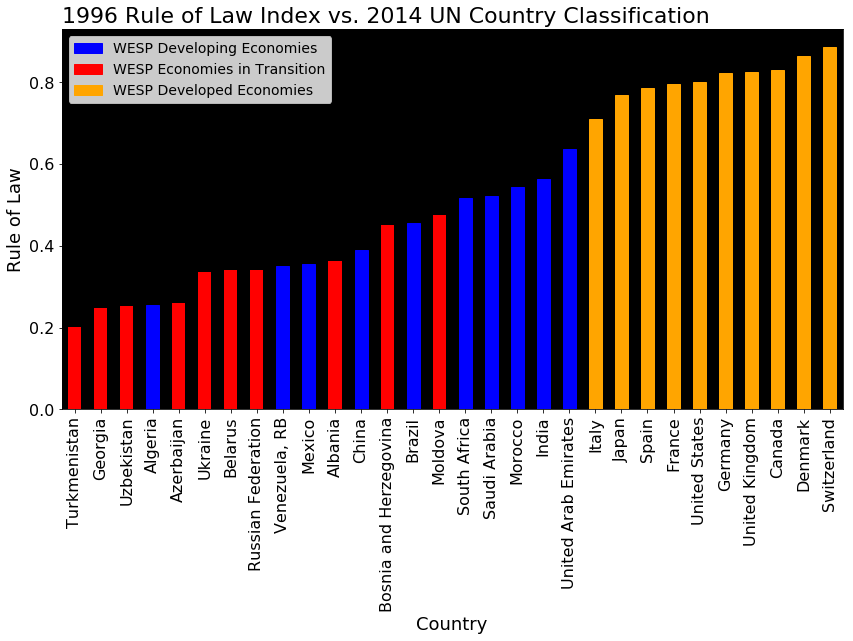

In [593]:
var = ['RL.EST']
# country list (ISO codes)
iso = ['DZA', 'ZAF', 'CHN', 'IND', 'BRA', 'MEX', 'ARE', 'SAU', 'VEN', 'MAR',
       'MDA', 'GEO', 'RUS', 'UKR', 'ALB', 'BIH', 'TKM', 'BLR', 'AZE', 'UZB',
       'CHE', 'CAN', 'JPN', 'FRA', 'DEU', 'ITA', 'GBR', 'USA', 'DNK', 'ESP']
year = 1996

# get Rule of Law data from World Bank
RLdf = wb.download(indicator=var, country=iso, start=year, end=year)

# munge data
RLdf = RLdf.reset_index(level='year', drop=True)
RLdf.columns = ['Rule of Law']
# current data is normalized from -2.5 to 2.5
min = -2.5
max = 2.5
# normalizes data to fall between 0 and 1
RLdf_norm = (RLdf - min) / (max - min)
# sort data by least to greatest Rule of Law Index
RLdf_norm = RLdf_norm.sort_values(by=['Rule of Law'])

# plot data with bar graph
fig, ax = plt.subplots(figsize = (14, 7))
RLdf_norm.plot(ax=ax, kind='bar', alpha = 1.0, color = 'red')
ax.set_title('1996 Rule of Law Index vs. 2014 UN Country Classification', loc='left', fontsize= 22)
ax.set_xlabel('Country').set_fontsize(18)
plt.xticks(fontsize=16)
ax.set_ylabel('Rule of Law').set_fontsize(18)
plt.yticks(fontsize=16)
ax.set_facecolor('black')

## color code bars based on 2014 WESP/UN classifications (use same coloring as default in pivot_ui scatterplots)
## unable to add colors/key as third variable using subplots method... indivdually set object colors instead

# change bar color to blue for WESP classified 'Developing Economies'
ax.get_children()[3].set_color('blue')
ax.get_children()[8].set_color('blue')
ax.get_children()[9].set_color('blue')
ax.get_children()[11].set_color('blue')
ax.get_children()[13].set_color('blue')
ax.get_children()[15].set_color('blue')
ax.get_children()[16].set_color('blue')
ax.get_children()[17].set_color('blue')
ax.get_children()[18].set_color('blue')
ax.get_children()[19].set_color('blue')
# create bar legend patch for 'Developing Economies'
blue_patch = mpatches.Patch(color='blue', label='WESP Developing Economies')


# leave bar color red for WESP classified 'Economies in Transition'
# create red legend patch for 'Economies in Transition'
red_patch = mpatches.Patch(color='red', label='WESP Economies in Transition')

# change bar color to orange for WESP classified 'Developed Economies'
ax.get_children()[20].set_color('orange')
ax.get_children()[21].set_color('orange')
ax.get_children()[22].set_color('orange')
ax.get_children()[23].set_color('orange')
ax.get_children()[24].set_color('orange')
ax.get_children()[25].set_color('orange')
ax.get_children()[26].set_color('orange')
ax.get_children()[27].set_color('orange')
ax.get_children()[28].set_color('orange')
ax.get_children()[29].set_color('orange')
# create orange legend patch for 'Developed Economies'
orange_patch = mpatches.Patch(color='orange', label='WESP Developed Economies')

# add all patches to legend
ax.legend(handles=[blue_patch, red_patch, orange_patch], fontsize=14)
plt.show()

## LEVEL 1: Governace Level (1996) vs. Development Level (1996)

### Governance Indicators (1996)

In [594]:
var = ['RL.EST', 'CC.EST', 'GE.EST', 'PV.EST', 'RQ.EST', 'VA.EST']
# country list (ISO codes)
iso = ['DZA', 'ZAF', 'CHN', 'IND', 'BRA', 'MEX', 'ARE', 'SAU', 'VEN', 'MAR',
       'MDA', 'GEO', 'RUS', 'UKR', 'ALB', 'BIH', 'TKM', 'BLR', 'AZE', 'UZB',
       'CHE', 'CAN', 'JPN', 'FRA', 'DEU', 'ITA', 'GBR', 'USA', 'DNK', 'ESP']
year = 1996

# get Governance Indicator data from World Bank
GOVdf = wb.download(indicator=var, country=iso, start=year, end=year)

# munge data
GOVdf = GOVdf.reset_index(level='year', drop=True)
GOVdf.columns = ['Rule of Law', 'Control of Corruption', 'Government Effectiveness', 
              'Political Stability', 'Regulatory Quality',
              'Voice and Accountability']
# sort data by country name
GOVdf = GOVdf.sort_index(axis=0, kind='mergesort')
# current Governance Indicator data is normalized from approx -2.5 to 2.5
min = -2.5
max = 2.5
# normalizes data to fall between 0 and 1
GOVdf_norm = (GOVdf - min) / (max - min)

# wrap text by setting column width
GOVdf_norm_styled = GOVdf_norm.style.set_table_styles([dict(selector="th",props=[('min-width', '130px'), ('max-width', '130px')])])

GOVdf_norm_styled

,Rule of Law,Control of Corruption,Government Effectiveness,Political Stability,Regulatory Quality,Voice and Accountability
country,,,,,,
Albania,0.363104,0.321219,0.362282,0.433238,0.40512,0.37034
Algeria,0.256361,0.386652,0.282247,0.143994,0.318513,0.266742
Azerbaijan,0.259768,0.210876,0.316722,0.334469,0.260738,0.275794
Belarus,0.340203,0.422078,0.423887,0.518726,0.281201,0.336045
Bosnia and Herzegovina,0.451663,0.445886,0.261591,0.381595,0.317846,0.479235
Brazil,0.4553,0.496284,0.471373,0.456364,0.559387,0.548415
Canada,0.829451,0.906282,0.848473,0.746741,0.797658,0.813267
China,0.390882,0.445762,0.430269,0.480809,0.446669,0.227691
Denmark,0.864162,0.946262,0.85181,0.788414,0.856653,0.807794


#### Rule of Law as a Measure of Governance (1996 levels)

In [595]:
# plot governance indicators against Rule of Law to show existing correlation, color code by country
pivot_ui(GOVdf_norm, rows = ['Control of Corruption', 'Rule of Law', 'country'], rendererName='Scatter Chart')

### Development Indicators (1996)

In [596]:
var = ['NY.GDP.PCAP.CD', 'SP.DYN.LE00.IN', 'SH.DYN.MORT', 'VC.IHR.PSRC.P5', 'SE.PRM.UNER.ZS', 
       'EG.ELC.ACCS.ZS', 'EN.ATM.CO2E.KD.GD']
# country list (ISO codes)
iso = ['DZA', 'ZAF', 'CHN', 'IND', 'BRA', 'MEX', 'ARE', 'SAU', 'VEN', 'MAR',
       'MDA', 'GEO', 'RUS', 'UKR', 'ALB', 'BIH', 'TKM', 'BLR', 'AZE', 'UZB',
       'CHE', 'CAN', 'JPN', 'FRA', 'DEU', 'ITA', 'GBR', 'USA', 'DNK', 'ESP']
year = 1996

# get Development Indicator data from World Bank
DEVdf = wb.download(indicator=var, country=iso, start=year, end=year)

# munge data
DEVdf = DEVdf.reset_index(level='year', drop=True)
DEVdf.columns = ['GDP Per Capita', 'Life Expectancy', 'Child Mortality', 'Homicide Rate', 'Children Out of School',
                 'Access to Electricity', 'CO2 Emissions']
# sort data by country name
DEVdf = DEVdf.sort_index(axis=0, kind='mergesort')

# wrap text by setting column width
DEVdf_styled = DEVdf.style.set_table_styles([dict(selector="th",props=[('min-width', '120px'), ('max-width', '120px')])])

DEVdf_styled

,GDP Per Capita,Life Expectancy,Child Mortality,Homicide Rate,Children Out of School,Access to Electricity,CO2 Emissions
country,,,,,,,
Albania,1046.36,72.5515,31.5,7.96762,nan,100,0.328616
Algeria,1596.03,68.491,42.3,nan,12.5614,95.3529,1.00107
Azerbaijan,409.217,65.4944,91.9,nan,6.74625,96.4764,3.30172
Belarus,1452.45,68.5122,15.5,9.46863,nan,100,2.83559
Bosnia and Herzegovina,736.975,72.2069,12.2,nan,nan,97.8291,0.676143
Brazil,5156.81,68.1047,46,nan,nan,92.8671,0.200845
Canada,21183.2,78.2305,6.7,1.94373,4.81115,100,0.427832
China,709.414,70.4814,45.5,nan,9.08705,92.7715,2.12999
Denmark,35650.7,75.5915,6.2,1.31298,1.8031,100,0.272862


#### Wealth and Development (1996 levels)

In [597]:
# plot development indicators against wealth to show existing correlation, color code by country
pivot_ui(DEVdf, rows = ['Life Expectancy', 'GDP Per Capita', 'country'], rendererName='Scatter Chart')

### Rule of Law vs. Development (1996 levels)

In [615]:
# combine Rule of Law indexes with Development indicators in a dataframe
RLdf_norm = RLdf_norm.sort_index(axis=0, kind='mergesort')
combined_df = pd.concat([RLdf_norm, DEVdf], axis=1)

# plot Rule of Law against Development indicators by country
pivot_ui(combined_df, rows = ['Life Expectancy', 'Rule of Law', 'country'], rendererName='Scatter Chart')

#### Pearson Standard Correlation Coefficient, All Countries

In [616]:
combined_df = combined_df.corr()
combined_df = combined_df.drop(combined_df.index[[1, 2, 3, 4, 5, 6, 7]])
combined_df = combined_df.drop('Rule of Law', 1)

# wrap text by setting column width
combined_df_styled = combined_df.style.set_table_styles([dict(selector="th",props=[('min-width', '120px'), 
                                                                                   ('max-width', '120px')])])

combined_df_styled

,GDP Per Capita,Life Expectancy,Child Mortality,Homicide Rate,Children Out of School,Access to Electricity,CO2 Emissions
Rule of Law,0.878372,0.736153,-0.618813,-0.326889,-0.393148,0.0666744,-0.605004


In [609]:
# create df with WESP Country classifications
countries = ['Albania', 'Algeria', 'Azerbaijan', 'Belarus', 'Bosnia and Herzegovina',
             'Brazil', 'Canada', 'China', 'Denmark', 'France', 'Georgia', 'Germany',
             'India', 'Italy', 'Japan', 'Mexico', 'Moldova', 'Morocco', 'Russian Federation',
             'Saudi Arabia', 'South Africa', 'Spain', 'Switzerland', 'Turkmenistan', 'Ukraine',
            'United Arab Emirates', 'United Kingdom', 'United States', 'Uzbekistan', 'Venezuela, RB']
classification = [ 'Economies in Transition', 'Developing Economies', 'Economies in Transition', 
                  'Economies in Transition', 'Economies in Transition', 'Developing Economies', 
                  'Developed Economies', 'Developing Economies', 'Developed Economies', 
                 'Developed Economies', 'Economies in Transition', 'Developed Economies', 
                  'Developing Economies', 'Developed Economies', 'Developed Economies', 
                  'Developing Economies', 'Economies in Transition', 'Developing Economies', 
                  'Economies in Transition', 'Developing Economies', 'Developing Economies', 
                  'Developed Economies', 'Developed Economies', 'Economies in Transition', 
                  'Economies in Transition', 'Developing Economies', 'Developed Economies', 
                  'Developed Economies', 'Economies in Transition', 'Developing Economies']

WESPdf = pd.DataFrame(data=classification, index=countries,columns=["WESP Classification"])

# combine Rule of Law indexes with Development indicators and WESP classifications in a dataframe
combined_df_byWESP = pd.concat([RLdf_norm, DEVdf, WESPdf], axis=1)

# change index to WESP classifications
combined_df_byWESP = combined_df_byWESP.set_index('WESP Classification')

# plot Rule of Law against Development indicators, indexed by country classification
pivot_ui(combined_df_byWESP, rows = ['Life Expectancy', 'Rule of Law', 'WESP Classification'], 
        rendererName='Scatter Chart')

#### Pearson Standard Correlation Coefficient, Developing Economies

In [617]:
# sort combined dataframe by WESP classification
combined_df_byWESP = combined_df_byWESP.sort_index(axis=0, kind='mergesort')

# separate Developing Economies into own dataframe (for purposes of regression analysis)
developing_df = combined_df_byWESP.drop(combined_df_byWESP.index[[0, 9]])
developing_df = developing_df.drop(developing_df.index[[10,19]])

developing_df = developing_df.corr()
developing_df = developing_df.drop(developing_df.index[[1, 2, 3, 4, 5, 6, 7]])
developing_df = developing_df.drop('Rule of Law', 1)

# wrap text by setting column width
developing_df_styled = developing_df.style.set_table_styles([dict(selector="th",props=[('min-width', '120px'), 
                                                                                   ('max-width', '120px')])])
developing_df_styled

,GDP Per Capita,Life Expectancy,Child Mortality,Homicide Rate,Children Out of School,Access to Electricity,CO2 Emissions
Rule of Law,0.54356,-0.247288,0.195003,0.159882,0.358387,-0.502294,-0.114255


#### Pearson Standard Correlation Coefficient, Economies in Transition

In [618]:
# separate Economies in Transition into own dataframe (for purposes of regression analysis)
transition_df = combined_df_byWESP.drop(combined_df_byWESP.index[[0,19]])

transition_df = transition_df.corr()
transition_df = transition_df.drop(transition_df.index[[1, 2, 3, 4, 5, 6, 7]])
transition_df = transition_df.drop('Rule of Law', 1)

# wrap text by setting column width
transition_df_styled = transition_df.style.set_table_styles([dict(selector="th",props=[('min-width', '120px'), 
                                                                                   ('max-width', '120px')])])
transition_df_styled

,GDP Per Capita,Life Expectancy,Child Mortality,Homicide Rate,Children Out of School,Access to Electricity,CO2 Emissions
Rule of Law,0.126167,0.474673,-0.699078,0.625323,-1,-0.163536,-0.341599


#### Pearson Standard Correlation Coefficient, Developed Economies

In [620]:
# separate Developed Economies into own dataframe (for purposes of regression analysis)
developed_df = combined_df_byWESP.drop(combined_df_byWESP.index[[19,29]])

developed_df = developed_df.corr()
developed_df = developed_df.drop(developed_df.index[[1, 2, 3, 4, 5, 6, 7]])
developed_df = developed_df.drop('Rule of Law', 1)

# wrap text by setting column width
developed_df_styled = developed_df.style.set_table_styles([dict(selector="th",props=[('min-width', '120px'), 
                                                                                   ('max-width', '120px')])])
developed_df_styled

,GDP Per Capita,Life Expectancy,Child Mortality,Homicide Rate,Children Out of School,Access to Electricity,CO2 Emissions
Rule of Law,0.505362,-0.344931,-0.147472,-0.0621861,0.608791,nan,-0.0734679


## LEVEL 2: Governance Level (1996) vs. Development Growth (1996-2014)

### Development Indicators, Continously Compounded Annualized Growth (1996 - 2014)

In [621]:
var = ['NY.GDP.PCAP.CD', 'SP.DYN.LE00.IN', 'SH.DYN.MORT', 'VC.IHR.PSRC.P5', 'SE.PRM.UNER.ZS', 
       'EG.ELC.ACCS.ZS', 'EN.ATM.CO2E.KD.GD']
# country list (ISO codes)
iso = ['DZA', 'ZAF', 'CHN', 'IND', 'BRA', 'MEX', 'ARE', 'SAU', 'VEN', 'MAR',
       'MDA', 'GEO', 'RUS', 'UKR', 'ALB', 'BIH', 'TKM', 'BLR', 'AZE', 'UZB',
       'CHE', 'CAN', 'JPN', 'FRA', 'DEU', 'ITA', 'GBR', 'USA', 'DNK', 'ESP']
year = 2014

# get Development Indicator data from World Bank
DEV14df = wb.download(indicator=var, country=iso, start=year, end=year)

# munge data
DEV14df = DEV14df.reset_index(level='year', drop=True)
DEV14df.columns = ['GDP Per Capita', 'Life Expectancy', 'Child Mortality', 'Homicide Rate', 'Children Out of School',
                 'Access to Electricity', 'CO2 Emissions']
# sort data by country name
DEV14df = DEV14df.sort_index(axis=0, kind='mergesort')

In [564]:
# set new dataframe using formula for continuously compounded annualized growth rates

# convert dataframes to numpy arrays before performing math
endval = DEV14df.values
beginningval = DEVdf.values
# t = 18 years from 1996 to 2014
t = 18
devgrowth = np.log(endval/beginningval)/t
# convert numpy array back to data frame
devgrowth_df = pd.DataFrame(devgrowth)
devgrowth_df.index = DEVdf.index
devgrowth_df.columns = DEVdf.columns

# wrap text by setting column width
devgrowth_df_styled = devgrowth_df.style.set_table_styles([dict(selector="th",props=[('min-width', '120px'), ('max-width', '120px')])])

devgrowth_df_styled

,GDP Per Capita,Life Expectancy,Child Mortality,Homicide Rate,Children Out of School,Access to Electricity,CO2 Emissions
country,,,,,,,
Albania,0.0820051,0.00402176,-0.0434866,-0.0382829,nan,0,0.0172586
Algeria,0.0683948,0.00551204,-0.0278997,nan,nan,0.00264363,-0.0128033
Azerbaijan,0.164404,0.00504844,-0.056564,nan,-0.0145921,0.00199286,-0.0909697
Belarus,0.0969574,0.00350259,-0.072542,-0.053725,nan,0,-0.057588
Bosnia and Herzegovina,0.108593,0.00318219,-0.0385082,nan,nan,0.00121931,0.0340815
Brazil,0.0470447,0.00532692,-0.0572978,nan,nan,0.00391651,0.00471472
Canada,0.0481991,0.00258261,-0.0140805,-0.014397,nan,0,-0.0193759
China,0.132355,0.00415674,-0.0764092,nan,nan,0.00416836,-0.0302786
Denmark,0.0312323,0.00363307,-0.0216369,-0.000552034,-0.00649207,0,-0.055842


In [644]:
# combine Rule of Law indexes with Development indicators in a dataframe
combined_df1 = pd.concat([RLdf_norm, devgrowth_df], axis=1)

# plot Rule of Law against Development growth by country
pivot_ui(combined_df1, rows = ['Life Expectancy', 'Rule of Law', 'country'], rendererName='Scatter Chart')

#### Pearson Standard Correlation Coefficient, All Countries

In [645]:
combined_df1 = combined_df1.corr()
combined_df1 = combined_df1.drop(combined_df1.index[[1, 2, 3, 4, 5, 6, 7]])
combined_df1 = combined_df1.drop('Rule of Law', 1)
combined_df1

# wrap text by setting column width
combined_df1_styled = combined_df.style.set_table_styles([dict(selector="th",props=[('min-width', '120px'), 
                                                                                   ('max-width', '120px')])])
combined_df1_styled

,GDP Per Capita,Life Expectancy,Child Mortality,Homicide Rate,Children Out of School,Access to Electricity,CO2 Emissions
Rule of Law,0.878372,0.736153,-0.618813,-0.326889,-0.393148,0.0666744,-0.605004


In [646]:
combined_df1_byWESP = pd.concat([RLdf_norm, devgrowth_df, WESPdf], axis=1)

# change index to WESP classifications
combined_df1_byWESP = combined_df1_byWESP.set_index('WESP Classification')

# plot Rule of Law against Development indicators, indexed by country classification
pivot_ui(combined_df1_byWESP, rows = ['Life Expectancy', 'Rule of Law', 'WESP Classification'], 
        rendererName='Scatter Chart')

#### Pearson Standard Correlation Coefficient, Developing Economies

In [658]:
# sort combined dataframe by WESP classification
combined_df1_byWESP = combined_df1_byWESP.sort_index(axis=0, kind='mergesort')
combined_df1_byWESP

# separate Developing Economies into own dataframe (for purposes of regression analysis)
developing_df1 = combined_df1_byWESP.drop(combined_df1_byWESP.index[[0, 9]])
developing_df1 = developing_df1.drop(developing_df1.index[[10,19]])

developing_df1 = developing_df1.corr()
developing_df1
developing_df1 = developing_df1.drop(developing_df1.index[[1, 2, 3, 4, 5, 6, 7]])
developing_df1 = developing_df1.drop('Rule of Law', 1)

# wrap text by setting column width
developing_df1_styled = developing_df1.style.set_table_styles([dict(selector="th",props=[('min-width', '120px'), 
                                                                                   ('max-width', '120px')])])
developing_df1_styled

,GDP Per Capita,Life Expectancy,Child Mortality,Homicide Rate,Children Out of School,Access to Electricity,CO2 Emissions
Rule of Law,-0.501916,-0.0467936,0.109335,-0.775404,-0.325008,0.496903,0.54859


#### Pearson Standard Correlation Coefficient, Economies in Transition

In [659]:
# separate Economies in Transition into own dataframe (for purposes of regression analysis)
transition_df1 = combined_df1_byWESP.drop(combined_df1_byWESP.index[[0,19]])

transition_df1 = transition_df1.corr()
transition_df1 = transition_df1.drop(transition_df1.index[[1, 2, 3, 4, 5, 6, 7]])
transition_df1 = transition_df1.drop('Rule of Law', 1)

# wrap text by setting column width
transition_df1_styled = transition_df1.style.set_table_styles([dict(selector="th",props=[('min-width', '120px'), 
                                                                                   ('max-width', '120px')])])
transition_df1_styled

,GDP Per Capita,Life Expectancy,Child Mortality,Homicide Rate,Children Out of School,Access to Electricity,CO2 Emissions
Rule of Law,-0.400727,-0.0455163,0.0821224,-0.735405,nan,0.161383,0.195248


#### Pearson Standard Correlation Coefficient, Developed Economies

In [660]:
# separate Developed Economies into own dataframe (for purposes of regression analysis)
developed_df1 = combined_df1_byWESP.drop(combined_df1_byWESP.index[[19,29]])

developed_df1 = developed_df1.corr()
developed_df1 = developed_df1.drop(developed_df1.index[[1, 2, 3, 4, 5, 6, 7]])
developed_df1 = developed_df1.drop('Rule of Law', 1)

# wrap text by setting column width
developed_df1_styled = developed_df1.style.set_table_styles([dict(selector="th",props=[('min-width', '120px'), 
                                                                                   ('max-width', '120px')])])
developed_df1_styled

,GDP Per Capita,Life Expectancy,Child Mortality,Homicide Rate,Children Out of School,Access to Electricity,CO2 Emissions
Rule of Law,0.460629,0.136763,0.691093,0.236711,-0.399136,nan,-0.562214


## LEVEL 3: Governance Growth (1996-2014) vs. Development Growth (1996-2014)

### Governance Indicators, Continuously Compounded Annualized Growth (1996 - 2014)

In [623]:
# create df for 2014 values

var = ['RL.EST', 'CC.EST', 'GE.EST', 'PV.EST', 'RQ.EST', 'VA.EST']
# country list (ISO codes)
iso = ['DZA', 'ZAF', 'CHN', 'IND', 'BRA', 'MEX', 'ARE', 'SAU', 'VEN', 'MAR',
       'MDA', 'GEO', 'RUS', 'UKR', 'ALB', 'BIH', 'TKM', 'BLR', 'AZE', 'UZB',
       'CHE', 'CAN', 'JPN', 'FRA', 'DEU', 'ITA', 'GBR', 'USA', 'DNK', 'ESP']
year = 2014

# get Governance Indicator data from World Bank
GOV14df = wb.download(indicator=var, country=iso, start=year, end=year)

# munge data
GOV14df = GOV14df.reset_index(level='year', drop=True)
GOV14df.columns = ['Rule of Law', 'Control of Corruption', 'Government Effectiveness', 
              'Political Stability', 'Regulatory Quality',
              'Voice and Accountability']
# sort data by country name
GOV14df = GOV14df.sort_index(axis=0, kind='mergesort')
# current Governance Indicator data is normalized from approx -2.5 to 2.5
min = -2.5
max = 2.5
# normalizes data to fall between 0 and 1
GOV14df_norm = (GOV14df - min) / (max - min)

In [624]:
# set new dataframe using formula for continuously compounded annualized growth rates

# convert dataframes to numpy arrays before performing math
endval1 = GOV14df_norm.values
beginningval1 = GOVdf_norm.values
# t = 18 years from 1996 to 2014
t = 18
govgrowth = np.log(endval1/beginningval1)/t
# convert numpy array back to data frame
govgrowth_df = pd.DataFrame(govgrowth)
govgrowth_df.index = GOVdf_norm.index
govgrowth_df.columns = GOVdf_norm.columns
govgrowth_df

# wrap text by setting column width
govgrowth_df_styled = govgrowth_df.style.set_table_styles([dict(selector="th",props=[('min-width', '130px'), 
                                                                                     ('max-width', '130px')])])

govgrowth_df_styled

,Rule of Law,Control of Corruption,Government Effectiveness,Political Stability,Regulatory Quality,Voice and Accountability
country,,,,,,
Albania,0.00970703,0.0108303,0.0159645,0.0178312,0.0164166,0.0197832
Algeria,0.0165566,-0.000964922,0.0199913,0.0332314,-0.0149403,0.0129824
Azerbaijan,0.018979,0.0188853,0.0166286,0.00825036,0.0296441,-0.0167071
Belarus,-0.00136622,0.00218568,-0.00283953,0.00181538,0.00327901,-0.0257429
Bosnia and Herzegovina,0.00136249,-0.000941434,0.0249343,0.0145859,0.0231352,0.000756466
Brazil,0.00408377,-0.0076671,8.89881e-05,0.00348883,-0.00800063,0.00447196
Canada,0.00316878,-0.00244345,0.000237301,-0.000872808,0.00475933,-0.00214453
China,0.00360728,-0.00174399,0.0150926,-0.0108534,-0.000407956,-0.0140959
Denmark,0.00343451,0.000186999,0.000776664,-0.00737863,-0.00126184,-0.000198347


In [629]:
# combine Rule of Law indexes with Development indicators in a dataframe
RLgrowth_df = govgrowth_df.drop(govgrowth_df.columns[[1, 2, 3, 4, 5]], axis=1)
combined_df2 = pd.concat([RLgrowth_df, devgrowth_df], axis=1)

# plot Rule of Law against Development indicators by country
pivot_ui(combined_df2, rows = ['Life Expectancy', 'Rule of Law', 'country'], rendererName='Scatter Chart')

#### Pearson Standard Correlation Coefficient, All Countries

In [636]:
combined_df2 = combined_df2.corr()
combined_df2 = combined_df2.drop(combined_df2.index[[1, 2, 3, 4, 5, 6, 7]])
combined_df2 = combined_df2.drop('Rule of Law', 1)
combined_df2

,GDP Per Capita,Life Expectancy,Child Mortality,Homicide Rate,Children Out of School,Access to Electricity,CO2 Emissions
Rule of Law,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [641]:
combined_df2_byWESP = pd.concat([RLgrowth_df, devgrowth_df, WESPdf], axis=1)

# change index to WESP classifications
combined_df2_byWESP = combined_df2_byWESP.set_index('WESP Classification')

# plot Rule of Law against Development indicators, indexed by country classification
pivot_ui(combined_df2_byWESP, rows = ['Life Expectancy', 'Rule of Law', 'WESP Classification'], 
        rendererName='Scatter Chart')

### Bibliography

“What is the Rule of Law?” World Justice Project, worldjusticeproject.org/about-us/overview/what-rule-law


“World Economic Situation and Prospects 2015 | OECD READ edition.” OECD iLibrary, 31 Dec. 2014, www.keepeek.com/Digital-Asset-Management/oecd/economic-and-social-development/world-economic-situation-and-prospects-2015_4e021dc3-en#.WjS6FFQ-egQ.


“Worldwide Governance Indicators.” Worldwide Governance Indicators | Data, data.worldbank.org/data-catalog/worldwide-governance-indicators.


“WJP Rule of Law Index® 2016.” WJP Rule of Law Index® 2016, data.worldjusticeproject.org.

“World Development Indicators.” World Development Indicators | Data, data.worldbank.org/data-catalog/world-development-indicators.